In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from visualization import semantic_inference
from SegmentationHead import SegWrapForViT
from lora import ViTWithLoRA
import timm
import torch
from torchvision.transforms import transforms as T
import numpy as np

C:\Users\Xiayin\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image = Image.open('./sample.jpg').convert('RGB')

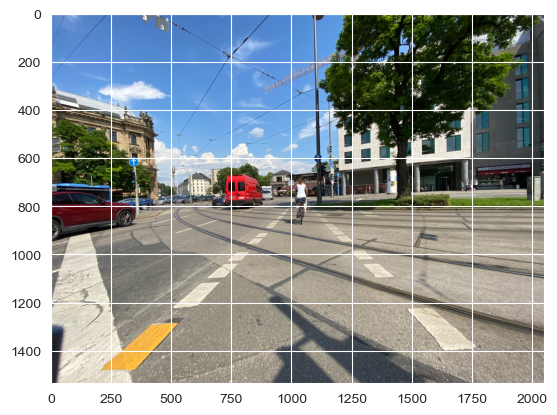

In [3]:
plt.imshow(image)

In [4]:
to_tensor = T.ToTensor()

In [5]:
img = to_tensor(np.array(image))

In [6]:
img = torch.unsqueeze(img, 0)

In [7]:
img.shape

torch.Size([1, 3, 1536, 2048])

In [23]:
seg= semantic_inference(img, './head_epoch_127.pth', './lora_epoch_127.safetensors')

In [24]:
seg.shape

In [25]:
plt.imshow(seg)

In [26]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.imshow(seg, cmap='rainbow')
plt.subplot(212)
plt.imshow(image)
plt.imshow(seg, cmap='rainbow', alpha=0.4)